In [1]:
import tensorflow as tf

In [2]:
movie = mnist = tf.keras.datasets.imdb

### Loads 10 000 most freqvent words into training data set
Training data set is array of 25 000

In [3]:
(train_data, train_labels), (test_data, test_labels) = movie.load_data(
num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [29]:
len(train_data)

25000

In [30]:
len(train_data[0])

218

In [22]:
max(train_data[0])

7486

In [9]:
train_labels[0]

1

In [23]:
max([max(sequence) for sequence in train_data])

9999

### Peek into the data set

In [24]:
word_index = movie.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [65]:
print(reverse_word_index.get(train_data[0][10]))

becomes


In [25]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Preparing the data

In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
list(enumerate(train_data[0]))

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

###Compiling the model

In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Setting validation set

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training the model

In [15]:
history = model.fit(partial_x_train, partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 50ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.3830 - val_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3035 - accuracy: 0.9055 - val_loss: 0.3036 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2223 - accuracy: 0.9262 - val_loss: 0.2962 - val_accuracy: 0.8798
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1757 - accuracy: 0.9416 - val_loss: 0.2735 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1451 - accuracy: 0.9547 - val_loss: 0.2868 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1173 - accuracy: 0.9625 - val_loss: 0.3381 - val_accuracy: 0.8717
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0959 - accuracy: 0.9718 - val_loss: 0.3303 - val_accuracy: 0.8797
Epoch 8/20
30

### Plotting validation and training loss



In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
import matplotlib.pyplot as plt

In [18]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [24]:
epochs = range(1, len(history_dict['accuracy']) + 1)

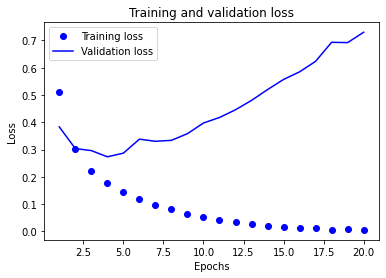

In [25]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting validation and training accuracy


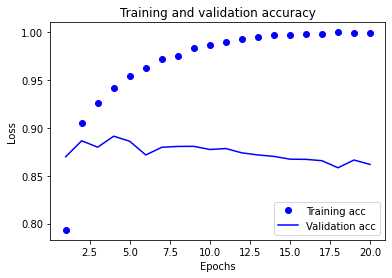

In [28]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# We can see that from the forth epoch our validation acc is going down due to overfitting the model

### Retrain model

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4512 - accuracy: 0.8266
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2569 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2015 - accuracy: 0.9274
Epoch 4/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1681 - accuracy: 0.9412


In [32]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3012 - accuracy: 0.8823


In [33]:
print(results)

[0.3012494444847107, 0.882319986820221]


In [34]:
model.predict(x_test)

array([[0.2742861 ],
       [0.99985504],
       [0.9487368 ],
       ...,
       [0.17680028],
       [0.0999831 ],
       [0.7829697 ]], dtype=float32)